# Clustering 2

## 문서에 적용하기

In [582]:
documents = [
    "This little kitty came to play when I was eating at a restaurant.",
    "Merley has the best squooshy kitten belly.",
    "Google Translate app is incredivle.",
    "If you open 100 tab in google you get a smiley face.",
    "Best cat photo I've ever taken.",
    "Climbing ninja cat.",
    "Impressed with google map feedback.",
    "Key promoter extension for Google Chrome."
]

In [583]:
# 다차원에 이용하기 위해서 변경
def euclidean(x,y):
    _sum = 0.0
    for i in range(len(x)):
        _sum += (x[i]-y[i]) ** 2  
    return sqrt(_sum)

In [584]:
def cosine(x,y):
    _sum = 0.0
    xLength =0.0
    yLength = 0.0
    
    for i in range(len(x)):
        _sum += x[i]*y[i]
        
    return _sum / (euclidean(x,[0 for _ in range(len(x))]) * euclidean(y,[0 for _ in range(len(x))]))

## 전처리

In [585]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import defaultdict

In [586]:
# DTM 만들기
# key : doc / val (Term:Freq)
DTM = defaultdict(lambda: defaultdict(int))
# key : Term / val (Doc:Freq)
TDM = defaultdict(lambda: defaultdict(int))
# key : Term / val (Doc:Weight)
TWM = defaultdict(lambda: defaultdict(float))

stopList = stopwords.words('english')

In [587]:
# i번째 doucument 내용 d
for i,d in enumerate(documents):
    for t in word_tokenize(d.lower()):  # 소문자로 변환된 구두점도 잘린 어절 리스트 
        if t not in stopList and not re.match(r"[{0}]".format(re.escape(punctuation)), t):
            DTM[i][t] += 1
            
for d, termList in DTM.items():
    for t,f in termList.items():
        TDM[t][d] = f
        
N = len(DTM)
V = len(TDM)

# TF-IDF
# TF : f / maxF
# IDF : N / df ( docList의 갯수)
from math import log

for t, docList in TDM.items():
    df = len(docList)
    for d,f in docList.items():
        maxtf = max(DTM[d].values())
        TWM[t][d] = (f/maxtf) * (log(N/df))

In [588]:
TWM

defaultdict(<function __main__.<lambda>()>,
            {'little': defaultdict(float, {0: 2.0794415416798357}),
             'kitty': defaultdict(float, {0: 2.0794415416798357}),
             'came': defaultdict(float, {0: 2.0794415416798357}),
             'play': defaultdict(float, {0: 2.0794415416798357}),
             'eating': defaultdict(float, {0: 2.0794415416798357}),
             'restaurant': defaultdict(float, {0: 2.0794415416798357}),
             'merley': defaultdict(float, {1: 2.0794415416798357}),
             'best': defaultdict(float,
                         {1: 1.3862943611198906, 4: 1.3862943611198906}),
             'squooshy': defaultdict(float, {1: 2.0794415416798357}),
             'kitten': defaultdict(float, {1: 2.0794415416798357}),
             'belly': defaultdict(float, {1: 2.0794415416798357}),
             'google': defaultdict(float,
                         {2: 0.6931471805599453,
                          3: 0.6931471805599453,
                      

In [589]:
K = 2 

In [590]:
# Vectorize 
# doc = [(0)*V] * N   # 특정 인덱스에만 값을 채워넣을 것.
# d1 = (0,0)

docVector = list(list(0.0 for _ in range(V)) for _ in range(N))

In [591]:
len(docVector), len(docVector[0])

(8, 34)

In [592]:
# TWM에서 문서개수만큼 돌기
# 행 : 문서 Idx
# 열 : 단어 idx

for i in range(N):
    for j,t in enumerate(TDM.keys()):
        docVector[i][j] = TWM[t][i]

In [593]:
len(docVector[0])

34

In [594]:
from random import sample
from random import randrange
cluster = sample(docVector,K)
# 단어가 없을 경우를 대비해서 뭐라도 하나 있게 만들어줌
# cluster = list()

# for i in range(K):
#     cluster.append(list(randrange(1,3) for _ in range(V)))

In [595]:
K = 2 
# 2개의 cluster에 대한 centroid
len(cluster), len(cluster[0])

(2, 34)

In [596]:
from math import sqrt

def expectation(data, clusters,k,cos=True):
    distance = list()
    metric = cosine if cos else euclidean
    rvalue = max if cos else min
    
    for i in range(k):
#         print(len(data)), print(len(clusters[i]))
        distance.append(metric(data,clusters[i]))
        
    return distance.index(rvalue(distance))  # cosine이어서 Min이 아니라 Max / euclidean : min




In [597]:
def maximization(data):
    N = len(data)
    _sum = list(0 for _ in range(len(data[0])))
    
    for _ in data:
        for i in range(len(_)):
            _sum[i] += _[i]
        
    return tuple(_/N for _ in _sum)  # x,y 좌표를 평균낸 것 

In [598]:
def sse(data,centroid):   # sum squared error
    _sum = 0.0
    
    for _ in data:
        _sum += euclidean(_,centroid)
        
    return _sum 

In [599]:
sseList = list()

for _ in range(10):
    rnk = list(list(0 for _ in range(K)) for _ in range(N))
    
    for i,d in enumerate(docVector):
        c = expectation(d,cluster,K,False)
        rnk[i][c] = 1
        
    _sum = 0.0
    
    for j ,c in enumerate(cluster):
        dataset = [docVector[i] for i in range(N) if rnk[i][j]]
        _sum += sse(dataset,c)        
        cluster[j] = maximization(dataset)
  
    sseList.append(_sum)

In [600]:
rnk

[[0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0]]

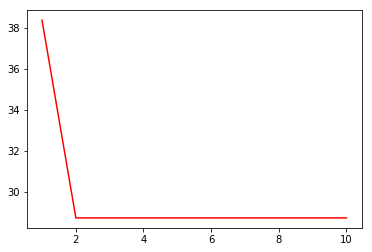

In [601]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),sseList,'r-')
plt.show()

In [602]:
clusterDataset = list()
for j ,c in enumerate(cluster):
    dataset = [i for i in range(N) if rnk[i][j]]
    clusterDataset.append(dataset)

In [603]:
len(clusterDataset), clusterDataset[0]

(2, [2, 3, 6, 7])

In [604]:
voca = list(TWM.keys())

In [605]:
list(voca)[0]

'little'

In [606]:
topic = list()
for c in cluster:
    wordList = defaultdict(float)
    for i ,w in enumerate(c):
        wordList[voca[i]] = w
    topic.append(dict(sorted(wordList.items(), key=lambda x:x[1], reverse=True )[:5]))

In [607]:
topic

[{'google': 0.6931471805599453,
  'translate': 0.5198603854199589,
  'app': 0.5198603854199589,
  'incredivle': 0.5198603854199589,
  'open': 0.5198603854199589},
 {'best': 0.6931471805599453,
  'cat': 0.6931471805599453,
  'little': 0.5198603854199589,
  'kitty': 0.5198603854199589,
  'came': 0.5198603854199589}]

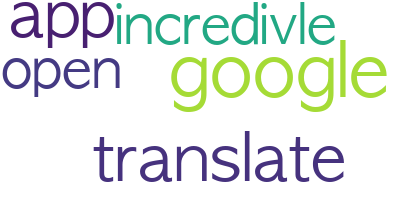

In [608]:
from wordcloud import WordCloud

fontPath = "/Library/Fonts/AppleGothic.ttf"
wc = WordCloud(font_path=fontPath,background_color='white')
wc.generate_from_frequencies(topic[0])  # dict 형태여야함 
wc.to_image() 

# 뉴스데이터에 적용하기 

In [1450]:
import os 
corpus = list()
for file in os.listdir('./News'):
    if file.startswith('세계'):
        with open('./News/'+file,encoding='utf-8') as f:
            corpus.append(f.read())

In [1451]:
corpus2 = list()
pattern = re.compile(r'[%s]' % re.escape(punctuation))

for i in range(len(corpus)):
    corpus[i] = pattern.sub('',corpus[i])
    corpus2.append(corpus[i])

In [1452]:
from konlpy.tag import Kkma

In [1453]:
# DTM 만들기
# key : doc / val (Term:Freq)
DTM = defaultdict(lambda: defaultdict(int))
# key : Term / val (Doc:Freq)
TDM = defaultdict(lambda: defaultdict(int))
# key : Term / val (Doc:Weight)
TWM = defaultdict(lambda: defaultdict(float))

stopList = stopwords.words('english')

In [1454]:
# N으로 끝나는것  / 앞의 글자수가 1을 넘게 해서 명사 거르기 

dictNoun = list()

for i in range(len(corpus2)):
    for t in Kkma().pos(corpus2[i]):
        if len(t[0]) > 1 and t[1].startswith('N'):
            dictNoun.append(t[0])
            
        DTM[i][t[0]] += 1
    
for d, termList in DTM.items():
    for t,f in termList.items():
        TDM[t][d] = f
        
N = len(DTM)
V = len(TDM)

# TF-IDF
# TF : f / maxF
# IDF : N / df ( docList의 갯수)
from math import log

for t, docList in TDM.items():
    df = len(docList)
    for d,f in docList.items():
        maxtf = max(DTM[d].values())
        TWM[t][d] = (f/maxtf) * (log(N/df))

In [1455]:
K=2

docVector = list(list(0.0 for _ in range(V)) for _ in range(N))

cluster = sample(docVector,K)
# cluster = list()

# for i in range(K):
#     cluster.append(list(randrange(1,3) for _ in range(V)))

In [1456]:
for i in range(N):
    for j,t in enumerate(TDM.keys()):
        docVector[i][j] = TWM[t][i]

In [1457]:
len(cluster), len(cluster[0])

(2, 3615)

In [1458]:
len(docVector), len(docVector[-1])

(31, 3615)

In [1459]:
len(list(enumerate(docVector))[0][1])

3615

In [1460]:
from math import sqrt

def expectation(data, clusters,k,cos=True):
    distance = list()
    metric = cosine if cos else euclidean
    rvalue = max if cos else min
    
    for i in range(k):
#         print(len(data)), print(len(clusters[i]))
        distance.append(metric(data,clusters[i]))
        
    return distance.index(rvalue(distance))  # cosine이어서 Min이 아니라 Max / euclidean : min





In [1461]:
def maximization(data):
    N = len(data)
    _sum = list(0 for _ in range(len(data[0])))
    
    for _ in data:
        for i in range(len(_)):
            _sum[i] += _[i]
        
    return tuple(_/N for _ in _sum)  # x,y 좌표를 평균낸 것 

In [1462]:
sseList = list()
cluster = sample(docVector,K)

for _ in range(10):
    rnk = list(list(0 for _ in range(K)) for _ in range(N))
    
    for i,d in enumerate(docVector):
        c = expectation(d,cluster,K,False)
        rnk[i][c] = 1
        
    _sum = 0.0
    
    for j ,c in enumerate(cluster):
        dataset = [docVector[i] for i in range(N) if rnk[i][j]]
      
        _sum += sse(dataset,c)        
        cluster[j] = maximization(dataset)
    
    sseList.append(_sum)

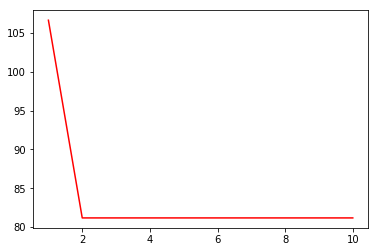

In [1463]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),sseList,'r-')
plt.show()

In [1464]:
clusterDataset = list()
for j ,c in enumerate(cluster):
    dataset = [i for i in range(N) if rnk[i][j]]
    clusterDataset.append(dataset)

In [1465]:
voca = list(TWM.keys())
topic = list()

for c in cluster:
    wordList = defaultdict(float)
    for i ,w in enumerate(c):
        wordList[voca[i]] = w
    topic.append(dict(sorted(wordList.items(), key=lambda x:x[1], reverse=True )[:5]))

In [1466]:
dict(sorted(wordList.items(), key=lambda x:x[1], reverse=True )[:5])

{'F': 0.13305876757598126,
 '전투기': 0.12361531066213463,
 '35': 0.11598733504193623,
 '개복치': 0.113920382767827,
 '버스': 0.10508954224557927}

In [1467]:
a = list(topic[0].keys())
dictNoun = list()
for i in a:
    dictNoun.extend([noun for noun in Kkma().nouns(i) if len(noun) > 1])

In [1468]:
topic[1]

{'F': 0.13305876757598126,
 '전투기': 0.12361531066213463,
 '35': 0.11598733504193623,
 '개복치': 0.113920382767827,
 '버스': 0.10508954224557927}

In [1469]:
from wordcloud import WordCloud

fontPath = "/Library/Fonts/AppleGothic.ttf"

wc = WordCloud(font_path=fontPath,background_color='white')
wc.generate_from_frequencies(topic[1])  # dict 형태여야함 


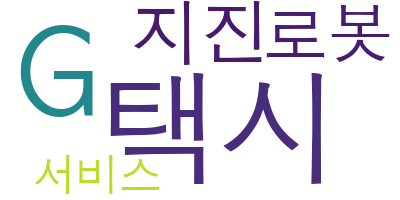

In [1348]:
# IT과학
wc.to_image() 

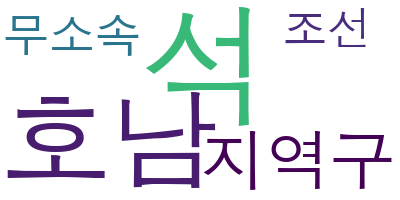

In [1382]:
# 정치 
wc.to_image() 

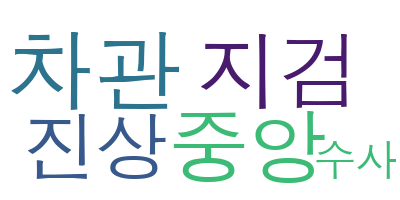

In [1404]:
# 사회
wc.to_image() 

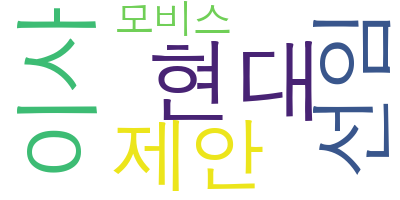

In [1425]:
# 경제
wc.to_image() 

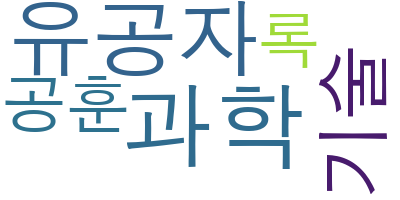

In [1449]:
# 생활문화
wc.to_image() 

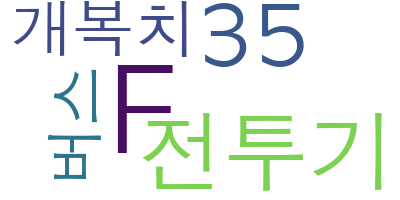

In [1470]:
# 세계
wc.to_image() 